In [10]:
import pandas as pd

In [11]:
Bolly_rap = pd.read_csv("D:\\R021\\project\\Features\\Bolly_Rap_Features - Bolly_Rap_Features.csv")
Bolly_rap['labels'] = pd.Series([0 for x in range(len(Bolly_rap.index))], index=Bolly_rap.index)
Bolly_rap.shape

Ghazal = pd.read_csv("D:\\R021\\project\\Features\\Ghazal_Features - Ghazal_Features.csv")
Ghazal['labels'] = pd.Series([1 for x in range(len(Ghazal.index))], index=Ghazal.index)
Ghazal.shape

Garhwali = pd.read_csv("D:\\R021\\project\\Features\\Garhwali_featres.csv")
Garhwali['labels'] = pd.Series([2 for x in range(len(Garhwali.index))], index=Garhwali.index)
Garhwali.shape

bhajan = pd.read_csv("D:\\R021\\project\\Features\\bhajan_featres.csv")
bhajan['labels'] = pd.Series([3 for x in range(len(bhajan.index))], index=bhajan.index)
bhajan.shape

bolly_roman = pd.read_csv("D:\\R021\\project\\Features\\bollywood_romantic.csv")
bolly_roman['labels'] = pd.Series([4 for x in range(len(bolly_roman.index))], index=bolly_roman.index)
bolly_roman.shape

sufi = pd.read_csv("D:\\R021\\project\\Features\\sufi_featres.csv")
sufi['labels'] = pd.Series([5 for x in range(len(sufi.index))], index=sufi.index)
sufi.shape


bhojpuri = pd.read_csv("D:\\R021\\project\Features\\bhojpuri_featres.csv")
bhojpuri['labels'] = pd.Series([6 for x in range(len(bhojpuri.index))], index=bhojpuri.index)

# Graient Boosing

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv("all_features.csv")

In [29]:
data.head()

Unnamed: 0                                          Song_Name  \
0           0  Aditi Singh Sharma - High Rated Gabru (Female ...   
1           1  Amaal Mallik - Zero Hour Mashup 2015(Remix By ...   
2           2        Anirudh Ravichander - Pori Pathi Vizhum.mp3   
3           3                        Badshah - Proper Patola.mp3   
4           4                     Badshah - She Move It Like.mp3   

   onset_strength  chroma_stft  chroma_cqt  chroma_cens  melspectrogram  \
0        1.558583     0.399325    0.501640     0.249157        7.062729   
1        1.370409     0.422881    0.475017     0.241708       18.979590   
2        1.475866     0.409791    0.491423     0.249568        7.932009   
3        1.595038     0.422150    0.485531     0.252525       12.572222   
4        1.620642     0.483835    0.365514     0.223681       14.925961   

       mfcc  spectral_centroid  spectral_bandwidth  spectral_contrast  \
0 -1.811182        2512.244015         2745.921532          21.380764   
1  4.403271        2641.350377         3498.785676          20.644559   
2  0.533828        3406.636170         3659.061440          20.396372   
3 -1.048275        3269.611281         3610.420577          20.391510   
4  1.051512        2836.057656         3116.927351          21.290714   

   spectral_rolloff   tonnetz  zero_crossing_rate  labels  
0       5197.796266  0.015492            0.054281       0  
1       6072.479538  0.014796            0.042882       0  
2       7632.464878  0.008711            0.068220       0  
3       7358.119696 -0.014358            0.066408       0  
4       6203.393641  0.050846            0.056044       0

In [30]:
X = data.drop(["labels", "Unnamed: 0", "Song_Name"], axis=1)
X.shape

(596, 12)

In [31]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [32]:
y = data["labels"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='gbdt',
                          learning_rate=0.1)
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1675
[LightGBM] [Info] Number of data points in the train set: 417, number of used features: 12
[LightGBM] [Info] Start training from score -1.798980
[LightGBM] [Info] Start training from score -1.715598
[LightGBM] [Info] Start training from score -1.922212
[LightGBM] [Info] Start training from score -2.204445
[LightGBM] [Info] Start training from score -2.044102
[LightGBM] [Info] Start training from score -1.972643
[LightGBM] [Info] Start training from score -2.044102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

LGBMClassifier()

In [37]:
# predict the results
y_pred=clf.predict(X_test)
print(y_pred)
print(y_test)

[4 1 2 2 1 3 5 6 3 5 2 2 6 2 1 6 4 6 2 0 4 2 0 2 4 0 1 5 4 2 4 3 3 5 2 1 0
 1 3 3 0 2 0 5 0 4 1 1 0 3 1 0 1 6 2 6 5 3 3 4 6 1 0 6 0 1 1 0 0 3 5 5 5 1
 3 0 4 6 0 0 0 0 1 4 5 6 2 6 6 6 0 2 0 0 1 5 5 0 0 1 6 5 3 5 2 4 4 1 2 4 1
 4 3 0 0 0 2 5 4 4 6 0 4 1 6 0 2 6 5 5 1 6 2 5 5 4 2 2 0 2 5 1 0 2 2 4 0 2
 1 1 2 5 0 3 1 2 1 6 1 4 6 6 6 4 4 1 6 0 6 6 0 6 5 4 1 3 6 4 2]
405    4
132    1
211    2
243    2
85     0
      ..
134    1
338    3
577    6
386    4
245    2
Name: labels, Length: 179, dtype: int64


In [38]:
# view accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7430


In [39]:
import pickle
filename = 'Best_GBM.pkl'
pickle.dump(clf.fit, open(filename, 'wb'))

# Little Visualisation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split

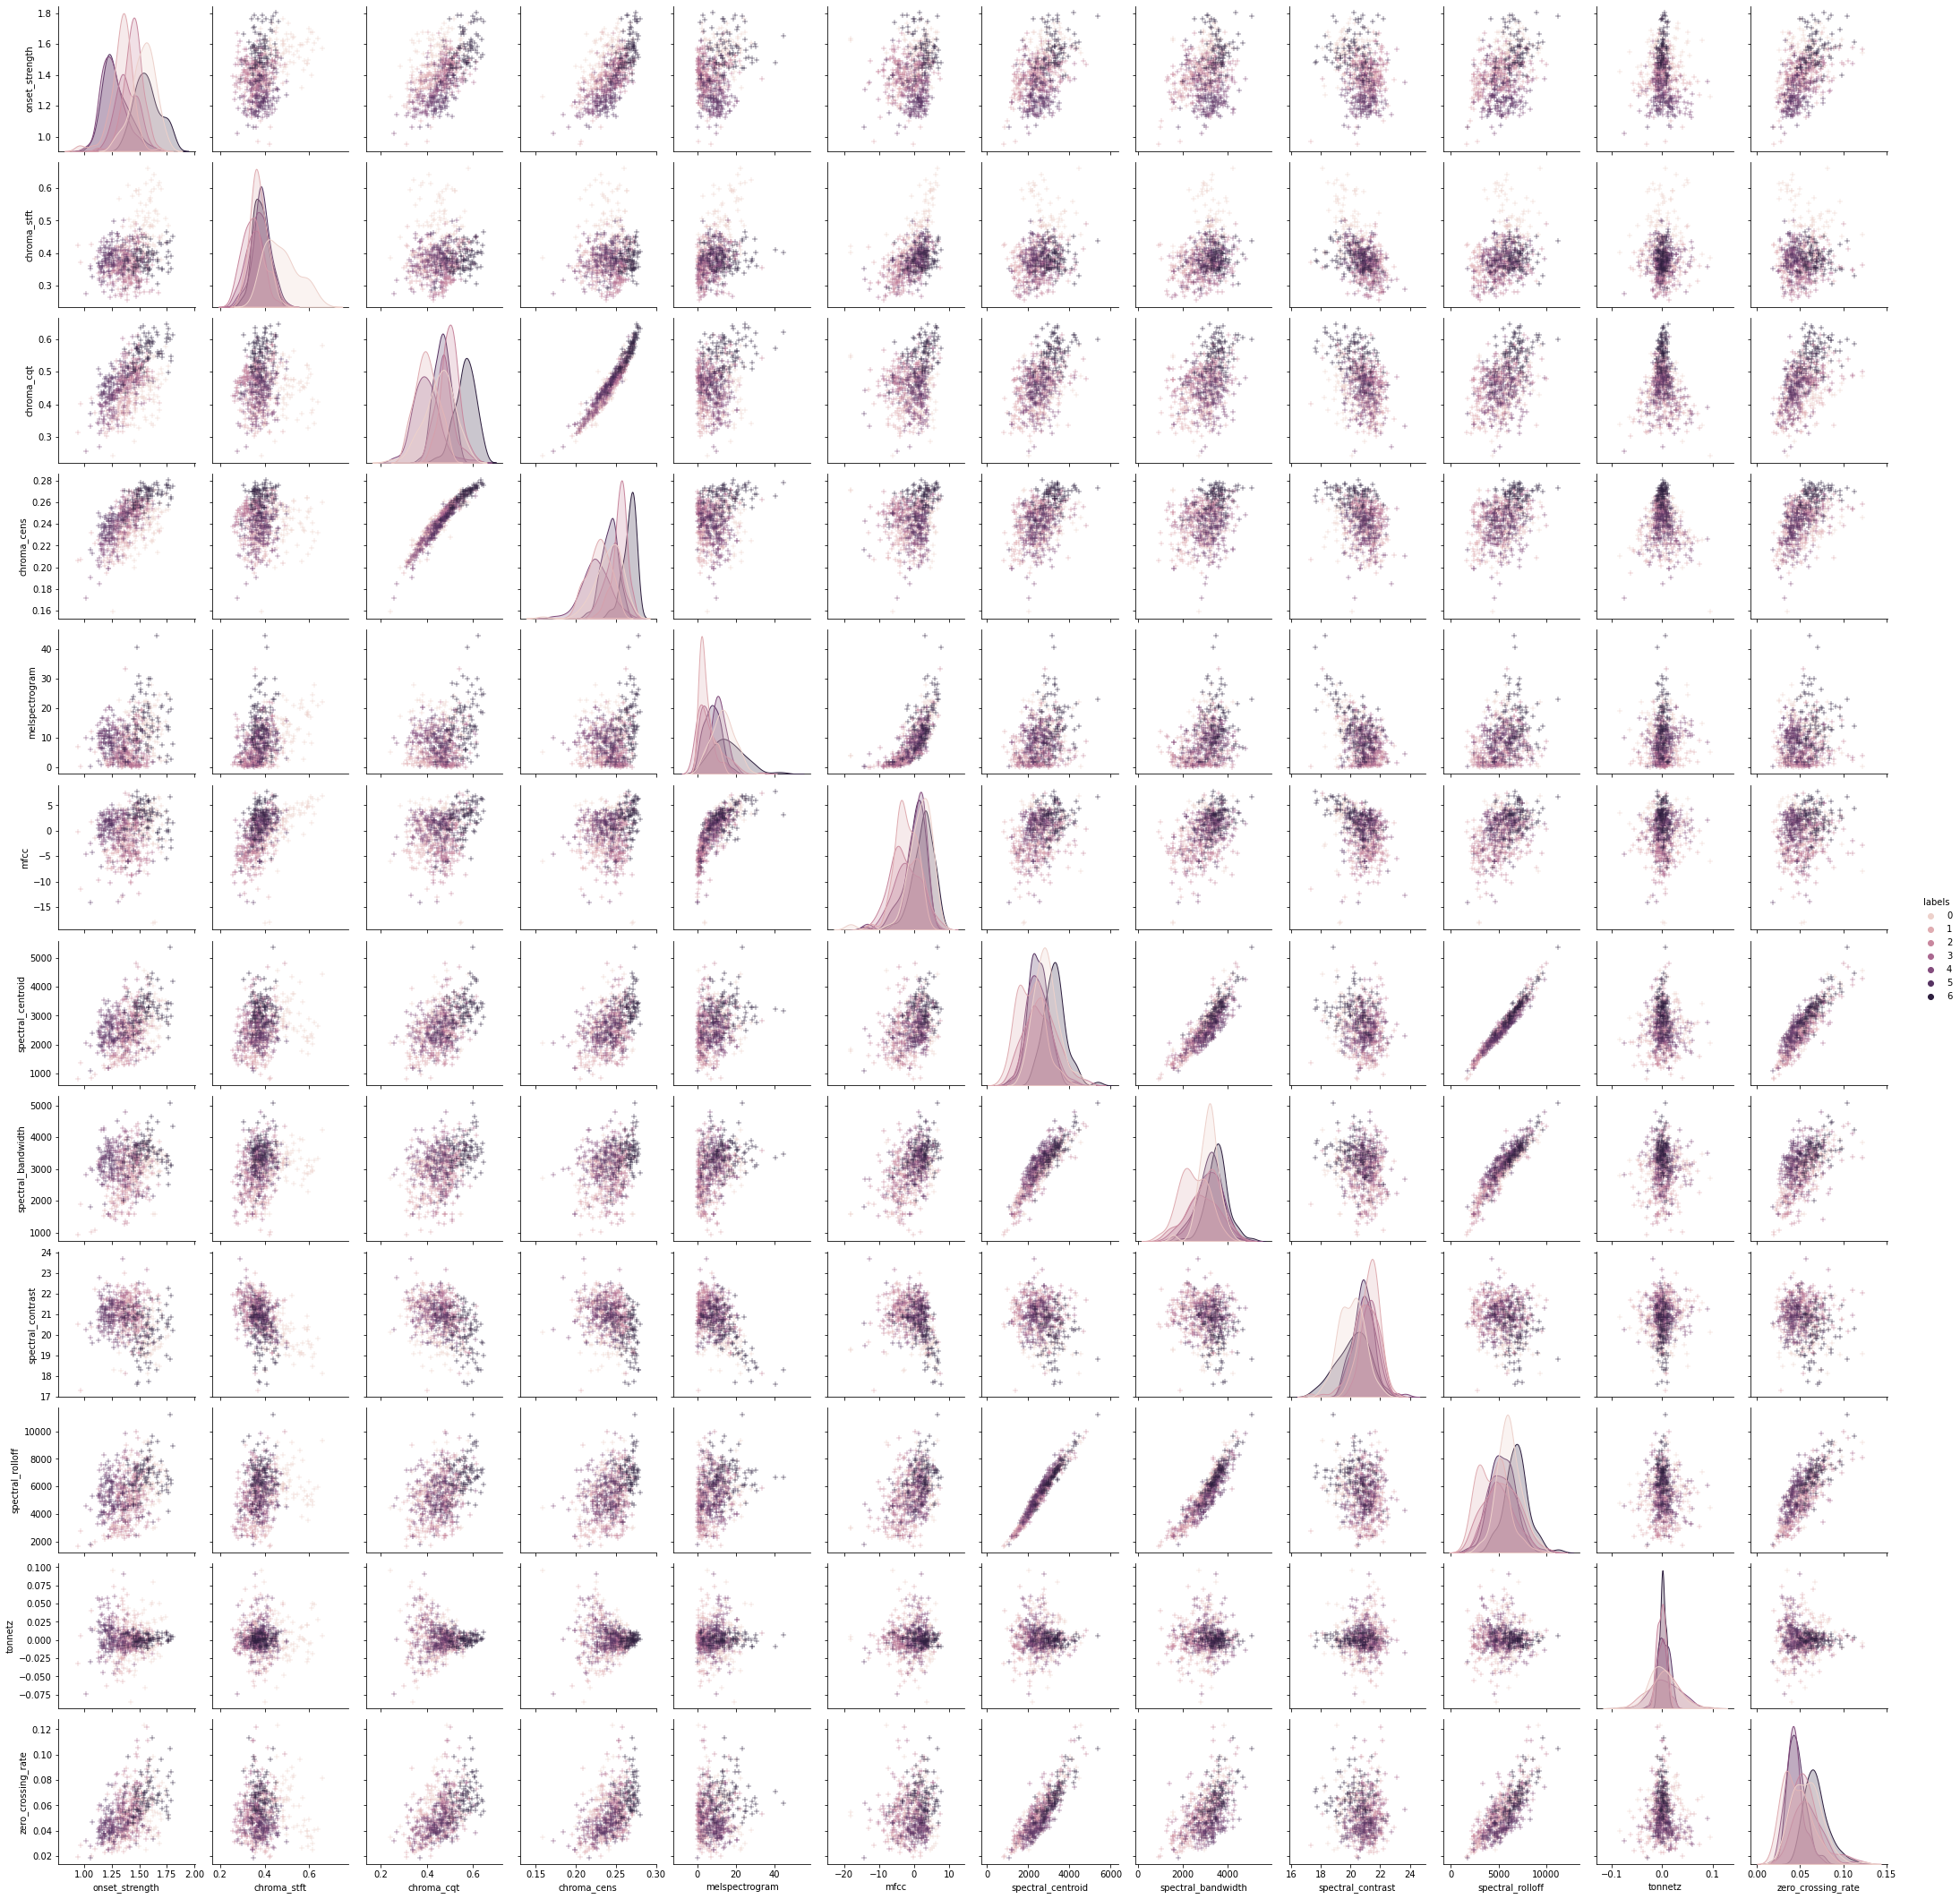

In [ ]:
tmp = X
g = sns.pairplot(tmp, hue='labels', markers='+')
plt.show()

In [ ]:
g = sns.violinplot(y='labels', x='chroma_stft', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='labels', x='mfcc', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='labels', x='spectral_contrast', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='labels', x='spectral_rolloff', data=data, inner='quartile')
plt.show()